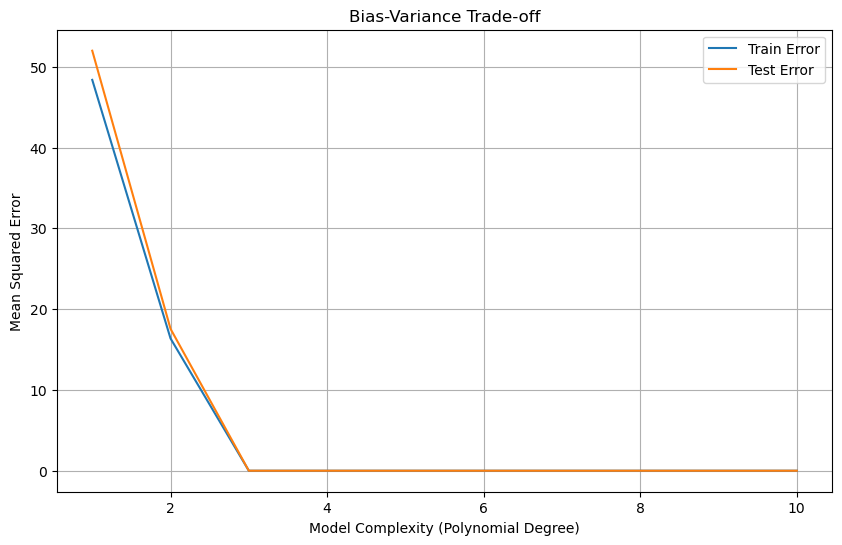

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Veri oluşturma
np.random.seed(0)
X = np.random.uniform(-3, 3, 100).reshape(-1, 1)
y = X**3 + 2 * X**2 + X + 1 + np.random.normal(0, 10, 100)


# Veriyi eğitim ve test olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Farklıklık dereceler
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_errors = []
test_errors = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

# Sonuçları görselle
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Train Error')
plt.plot(degrees, test_errors, label='Test Error')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Trade-off')
plt.legend()
plt.grid(True)
plt.show()

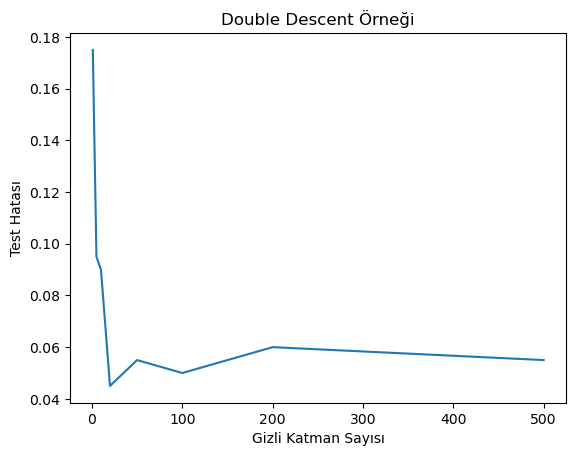

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Veri oluşturma
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, n_repeated=0, n_classes=2)

# Eğitim ve test verilerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelin karmaşıklığının artmasıyla birlikte test hatasının değişimini göstermek için bir dizi gizli katman sayısı tanımlama
hidden_layer_sizes = [1, 5, 10, 20, 50, 100, 200, 500]

# Test hatalarını depolamak için bir liste tanımlama
test_errors = []

# Her gizli katman sayısı için modeli eğitme ve test hatasını hesaplama
for hidden_layer_size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_error = np.mean(y_pred != y_test)
    test_errors.append(test_error)

# Test hatalarını grafiğe çizme
plt.plot(hidden_layer_sizes, test_errors)
plt.xlabel('Gizli Katman Sayısı')
plt.ylabel('Test Hatası')
plt.title('Double Descent Örneği')
plt.show()

In [19]:
model = MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_error = np.mean(y_pred != y_test)
test_errors.append(test_error)

In [28]:
import pandas as pd
df = pd.DataFrame({'X': X.flatten(), 'y': y})

ValueError: All arrays must be of the same length

In [25]:
y

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [20]:
(y_pred ==y_test).sum()

191

In [22]:
y_pred.shape , y_test.shape

((200,), (200,))

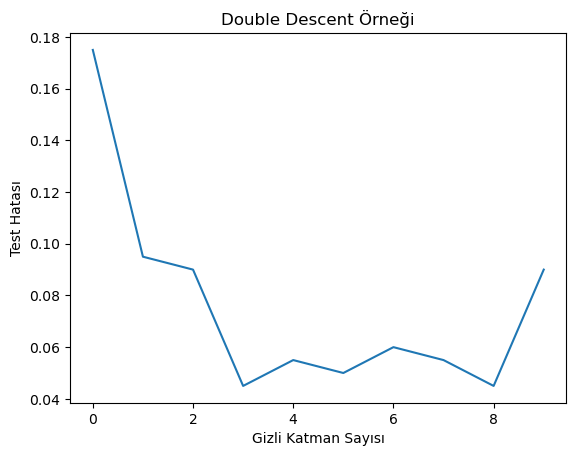

In [12]:
# Test hatalarını grafiğe çizme
plt.plot( test_errors)
plt.xlabel('Gizli Katman Sayısı')
plt.ylabel('Test Hatası')
plt.title('Double Descent Örneği')
plt.show()